## Hardcoded constraints: (see https://www.biorxiv.org/content/10.1101/846279v1, bottom of page 3)

In [35]:
import numpy as np

#Label the center value of the bins in each of the predicted distributions:
bin_dict = {
    'theta': [str(bin) for bin in np.linspace(0, 360, num = 25) + 7.50][:-1] + ['no-contact'], #Theta-angles            (degrees)
    'phi':   [str(bin) for bin in np.linspace(0, 180, num = 13) + 7.50][:-1] + ['no-contact'], #Phi-angles              (degrees)
    'dist':  [str(bin) for bin in np.linspace(2,  20, num = 37) + 0.25][:-1] + ['no-contact'], #Inter-residue distances (Angstroms)
    'omega': [str(bin) for bin in np.linspace(0, 360, num = 25) + 7.50][:-1] + ['no-contact'], #Omega-angles            (degrees)
    
}

In [36]:
import matplotlib.pylab as plt
%matplotlib inline

def plot_distogram(distogram, title ='', clim = None):
    plt.figure()
    plt.imshow(distogram)
    plt.title(title, fontsize=14)
    plt.xlabel('Residue i')
    plt.ylabel('Residue j')
    if clim is not None:
        plt.clim(clim[0],clim[1])
    plt.colorbar()
    plt.show()

def plot_distribution(predictions, i, j, key):
    distribution = predictions[key][:,i,j]
    plt.figure(figsize=(8,3))
    plt.bar(np.arange(len(distribution)), distribution)
    plt.title("%s bin distribution for residue pair [%d - %d]" %(key,i,j))
    plt.ylim((0,0.75))
    plt.xlabel("%s bin id" %key)
    plt.ylabel("Predicted Probability")
    plt.show()

## Load the prediction file:

In [107]:
prediction_path = "T1001.npz"
prediction_path = "T1001_noMSA.npz"

predictions = dict(np.load(prediction_path))
for key in predictions.keys():
    predictions[key] = predictions[key][0]
    print(predictions[key].shape, key)
    
n_residues = predictions[key].shape[-1]

(25, 140, 140) theta
(13, 140, 140) phi
(37, 140, 140) dist
(25, 140, 140) omega


## Plot some samples of the predicted distributions:

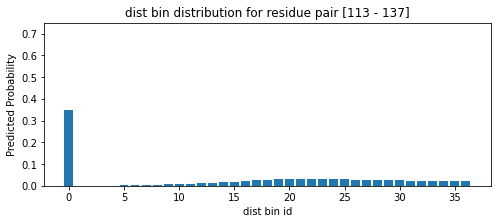

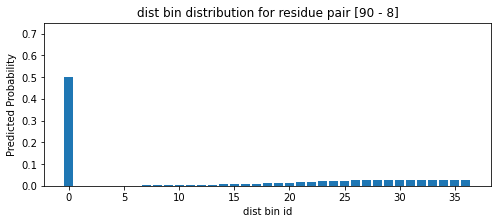

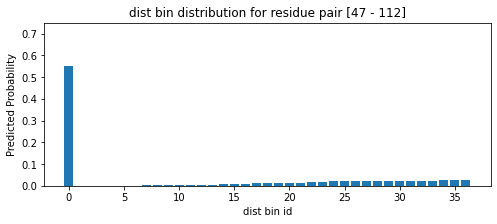

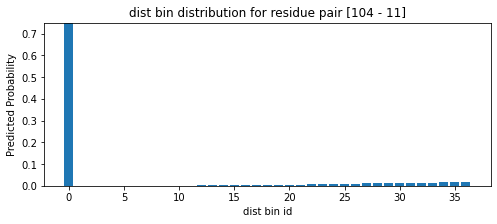

In [108]:
def plot_some_samples(n_samples, key):
    for i in range(n_samples):
        i,j = np.random.randint(0, high = n_residues, size=2)
        plot_distribution(predictions, i, j, key)
        
plot_some_samples(4, 'dist')

## Plot the distogram corresponding to the main mode of the distogram distribution:

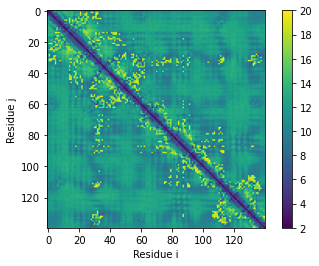

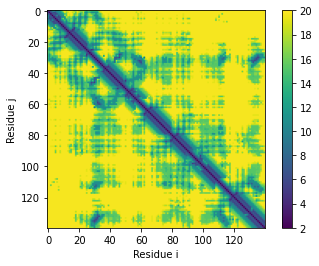

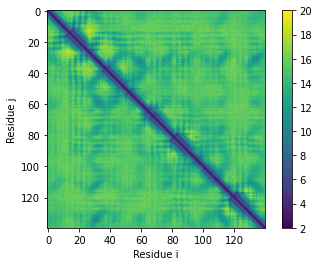

In [109]:
larger_than_20 = 20.5

def sample_distogram_bins(distogram_distribution, n_samples):
    sampled_distogram_bins = np.zeros((n_residues, n_residues)).astype(int)
    
    for i in range(n_residues):
        for j in range(n_residues):
            prob = distogram_distribution[:, i, j]
            prob = prob / np.sum(prob)
            
            samples = np.random.choice(len(distogram_distribution), n_samples, p=prob)
            sampled_distogram_bins[i,j] = int(np.mean(samples))
    
    return sampled_distogram_bins

def distogram_distribution_to_distogram(distribution, reduction_style = 'sample'):
    
    #Remove only the special clas "no-contact":
    distogram_distribution = distribution[1:]
    
    #Bin Distances in Angstroms:
    distances = np.array([float(f) for f in bin_dict['dist'][:-1]])
    
    if reduction_style == 'max':
        D_pred_bins = np.argmax(distogram_distribution, axis=0)
    elif reduction_style == 'mean':
        D_pred_bins = (np.abs(distogram_distribution - np.mean(distogram_distribution, axis = 0))).argmin(axis=0)
    elif reduction_style == 'sample':
        D_pred_bins = sample_distogram_bins(distogram_distribution, 1000)
        
    estimated_distogram = distances[D_pred_bins]
    np.fill_diagonal(estimated_distogram, 2)
    
    return estimated_distogram

y_min, y_max = 2, 20

distogram = distogram_distribution_to_distogram(predictions['dist'], reduction_style = 'mean')
plot_distogram(distogram, clim = [y_min, y_max])

distogram = distogram_distribution_to_distogram(predictions['dist'], reduction_style = 'max')
plot_distogram(distogram, clim = [y_min, y_max])

distogram = distogram_distribution_to_distogram(predictions['dist'])
plot_distogram(distogram, clim = [y_min, y_max])

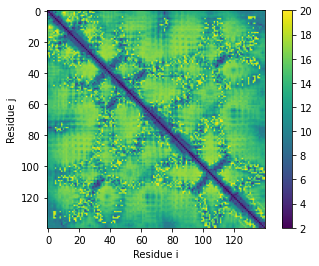

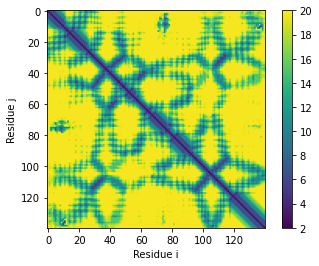

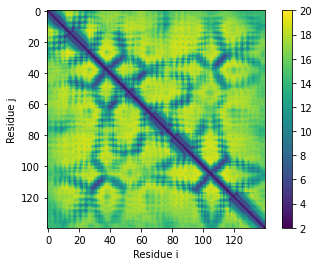